# Mandatory exercise 

In [3]:
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.corpus import treebank
from nltk.tag import tnt
from nltk.tag.perceptron import PerceptronTagger
from nltk.tag import CRFTagger
from time import process_time

The next class is used to define each one of the models in a common class. It contains functions to evaluate and train the model as well as the attributes to save the time and train data size, the name and finally, the accuracy (after the evaluation took place).

The models are:
* Hidden Markov Model (HMM)
* Trigrams'n'Tags (TnT)
* Perceptron (PER)
* Conditional Random Field (CRF)

We also define an array with these names to create the POSTagger instaces

In [4]:
class POSTagger:
    def __init__(self, name):
        self.name = name
        self.accuracy = 0
        self.time = 0
        self.train_size = 0
        self.model = None
    
    def evaluate(self, test_data):
        self.accuracy = self.model.evaluate(test_data)
        
    def train(self, train_data):
        start = process_time()
        self.train_size = len(train_data)
        if self.name == 'HMM': 
            self.model = HiddenMarkovModelTrainer().train_supervised(train_data)
        elif self.name == 'TnT':
            self.model = tnt.TnT()
            self.model.train(i)
        elif self.name == 'PER':
            self.model = PerceptronTagger(load=False)
            self.model.train(i)
        elif self.name == 'CRF':
            self.model = CRFTagger()
            self.model.train(i, 'crf_tagger_model')
        self.time = process_time() - start
        print(self.name, 'trained for size', self.train_size)
            
model_names = ['HMM', 'TnT', 'PER', 'CRF']

Next, we read the sentences tagged to train and test our models

In [5]:
train_size = [500, 1000, 1500, 2000, 2500, 3000]
all_sents  = treebank.tagged_sents()
test_data  = all_sents[3000:]
train_data = []

for i in train_size:
    train_data.append(all_sents[:i])
    print('Train data with size %d ready' % i)

Train data with size 500 ready
Train data with size 1000 ready
Train data with size 1500 ready
Train data with size 2000 ready
Train data with size 2500 ready
Train data with size 3000 ready


Now the training for the models take place. For each train data (size 500, size 1000, ...) and for each model type (HMM, TnT, ...) a new instance is created and trained.

In [5]:
models = {
    'HMM': [],
    'TnT': [],
    'PER': [],
    'CRF': []
}

for i in train_data:
    for name in model_names:
        models[name].append(POSTagger(name))
        models[name][-1].train(i)

HMM trained for size 500
TnT trained for size 500
PER trained for size 500
CRF trained for size 500
HMM trained for size 1000
TnT trained for size 1000
PER trained for size 1000
CRF trained for size 1000
HMM trained for size 1500
TnT trained for size 1500
PER trained for size 1500
CRF trained for size 1500
HMM trained for size 2000
TnT trained for size 2000
PER trained for size 2000
CRF trained for size 2000
HMM trained for size 2500
TnT trained for size 2500
PER trained for size 2500
CRF trained for size 2500
HMM trained for size 3000
TnT trained for size 3000
PER trained for size 3000
CRF trained for size 3000


Now the evaluation takes place, each model is evaluated against the test data (after the evaluation, the POSTagger class automaticaly calculates the accuracy).

In [6]:
for name in models:
    for model in models[name]:
        model.evaluate(test_data)
    print('All', name, 'models tested')

All HMM models tested
All TnT models tested
All PER models tested
All CRF models tested


Finally, we create the graphs using the values calculated during the training and the evaluation (explanation bellow).

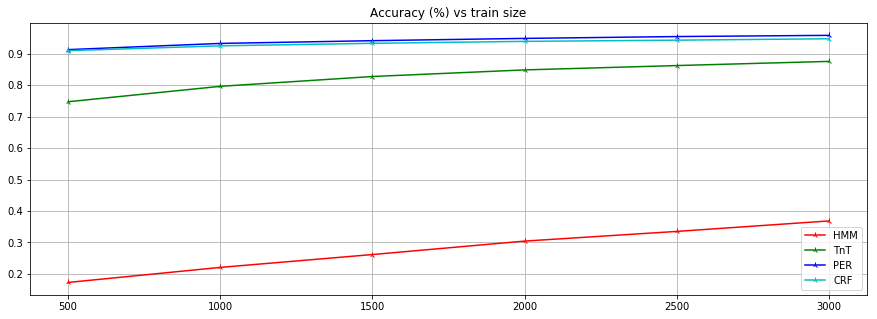

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 5]

colors = ['r', 'g', 'b', 'c']
color_idx = 0

for name in models:
    x = []
    y = []
    for model in models[name]:
        x.append(model.train_size)
        y.append(model.accuracy)
    plt.plot(x, y, colors[color_idx] + "2-", label=name)
    color_idx += 1

plt.grid()
plt.title("Accuracy (%) vs train size")
plt.legend(loc='best')
plt.show()

In this graph, the HMM performs pretty bad in comparision with the other three models, where the PER and CRF models seems to give a great result. The HMM model seems to grow lineary while the others seem to grow logarithmicaly, but it will probably behave logarithmicaly slowly approaching the 100% when (if) the accuracy reachs the 80-90%.

However, if "lower" accuracy is ok, the TnT model is better than the PER and CRF models, because as seen in the next graph, its training time is much smaller than that one from the PER and CRF

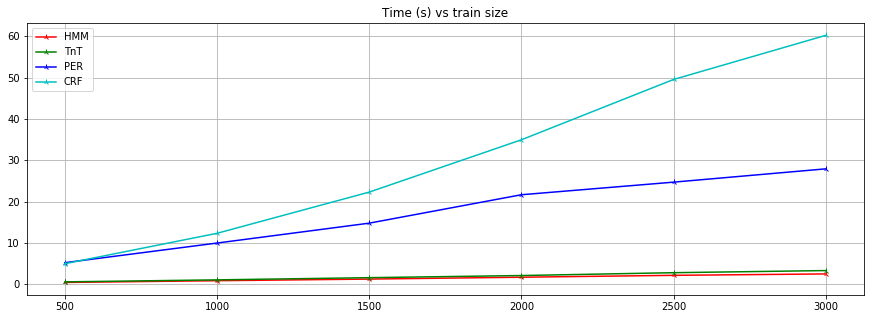

In [12]:
color_idx = 0

plt.rcParams["figure.figsize"] = [15, 5]

for name in models:
    x = []
    y = []
    for model in models[name]:
        x.append(model.train_size)
        y.append(model.time)
    plt.plot(x, y, colors[color_idx] + "2-", label=name)
    color_idx += 1

plt.grid()
plt.title("Time (s) vs train size")
plt.legend(loc='best')
plt.show()